In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib import cm

from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability, a_jkValues
from py.analysis import tr, det, lmbd

from py.kernels import gaussian, exponential

from py.explo import collectStabilities2



# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
exc = np.linspace(-0.8,0.2,2001)
ii = -1

res = np.zeros(len(exc))
ims = np.zeros(len(exc))

for idx, ee in enumerate(exc):
    params={'I_e': ee, 'I_i': ii, 'end_t': 2000, 'n': 128}
    ps = setParams(params)
    fps = computeFPs(ps)
    stab, w = checkFixPtsStability(fps, ps)

    res[idx] = w.real[0]
    ims[idx] = w.imag[0]
    
   # print('eigval %s ' %str(w))
   # print('fixed points %s ' %str(fps))
   # print('with (mass) stability %s'  %str(stab))

#res = ws.real
#ims = ws.imag
ims

/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:25: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_e*(x-params.mu_e)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:29: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_i*(x-params.mu_i)))


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
plt.plot(exc.T, res)
plt.plot(exc.T, ims)

In [ ]:
df

In [7]:
df[df['p_random']==4]

,I_e,I_i,stability,turing,turing_hopf,p_random,p_turing
0,-3.2,-4.0,0,0,0,4,0
0,-3.0,-3.6,0,0,0,4,0
0,-2.8,-3.4,0,0,0,4,0
0,-2.4,-2.8,1,0,0,4,0
0,-2.2,-2.6,1,0,0,4,0
0,-1.4,-2.0,0,0,0,4,0
0,-1.2,-1.8,1,0,0,4,0


In [8]:
stabis = df.pivot_table('stability', columns='I_e', index='I_i')
turings = df.pivot_table('turing', columns='I_e', index='I_i')
p_randoms = df.pivot_table('p_random', columns='I_e', index='I_i')

In [9]:
p_turings = df.pivot_table('p_turing', columns='I_e', index='I_i')

In [29]:
def plot2DiscreteMaps(df, xaxis='I_e', yaxis='I_i'):
    
    p_colors = cm.get_cmap('Accent', 4)
    
    stabis = df.pivot_table('stability', columns=xaxis, index=yaxis)
    turings = df.pivot_table('turing', columns=xaxis, index=yaxis)
    p_randoms = df.pivot_table('p_random', columns=xaxis, index=yaxis)
        
    p_turings = df.pivot_table('p_turing', columns=xaxis, index=yaxis)
    
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6),dpi=120)

    ax1.imshow(p_randoms, origin='lower', vmin=1, vmax=4, aspect='auto', cmap=p_colors)
    ax1.contour(stabis, origin='lower', vmin=0, vmax=2, levels=1, cmap='YlGnBu', linewidths=3)
    ax1.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors='black', linewidths=3, linestyles='dashed')
    ax1.set(title='Random initialization')

    ax2.imshow(p_turings, origin='lower', vmin=1, vmax=4, aspect='auto', cmap=p_colors)
    ax2.contour(stabis, origin='lower', vmin=0, vmax=2, levels=1, cmap='YlGnBu', linewidths=3)
    ax2.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors='black', linewidths=3, linestyles='dashed')
    ax2.set(title='Initialization in Turing unstable FP')
    
    
    pos = ax2.imshow(p_turings, vmin=1, vmax=4, origin='lower', aspect='auto', cmap=p_colors)
    
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    #cbar = fig.colorbar(pos, ax=ax2, extend='both')
    
    nmb_labels = 5
                
    idx_x = np.linspace(0,len(stabis.columns.values)-1, nmb_labels).astype(int) # np.round(np.linspace(0, len(a[0]) - 1, nmb_labels)).astype(int)
    idx_y = np.linspace(0,len(stabis.index.values)-1, nmb_labels).astype(int) # np.round(np.linspace(0, len(a) - 1, nmb_labels)).astype(int)
        
    xliste= np.round(stabis.columns.values, decimals=2)[idx_x]
    yliste= np.round(stabis.index.values, decimals=2)[idx_y]
    
    #xliste = np.linspace(xaxis[0],xaxis[-1],nmb_labels)
    #yliste = np.linspace(yaxis[-1],yaxis[0],nmb_labels)
    
    xlabels=list('%.1f'%(e) for e in xliste)
    ylabels=list('%.1f'%(e) for e in yliste)
    
    for ax in [ax1, ax2]:
        ax.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
        ax.set_xticklabels(labels=xlabels, fontsize=20)
        ax.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
        ax.set_yticklabels(labels=ylabels, fontsize=20)
        
        ax.set_xlabel(r'$%s$' %xaxis, fontsize=20)
        ax.set_ylabel(r'$%s$' %yaxis, fontsize=20, labelpad=10, rotation=0)
        
        ax.label_outer()
    
    mini = 1 #math.floor(vmin*10)/10 
    maxi = 4
    cbar_ticks=np.linspace(mini,maxi,4)
    cbar_ticks=np.around(cbar_ticks, decimals=0)
    cbar_labels=['stat', 'temp', 'spat', 'spatiotemp']
    
    # Create colorbar
    cbar = ax2.figure.colorbar(pos, ax=ax2, ticks=cbar_ticks)
    cbar.ax.set_ylabel('pattern-type', rotation=-90, va="bottom")
    cbar.ax.set_yticklabels(cbar_labels)
        
        
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    cbar.minorticks_on()
    
    
    plt.show()

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1663/1111871538.py:15: UserWarning: No contour levels were found within the data range.
  ax1.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors='black', linewidths=3, linestyles='dashed')
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1663/1111871538.py:20: UserWarning: No contour levels were found within the data range.
  ax2.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors='black', linewidths=3, linestyles='dashed')
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1663/1111871538.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels, fontsize=20)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1663/1111871538.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels, fontsize=20)


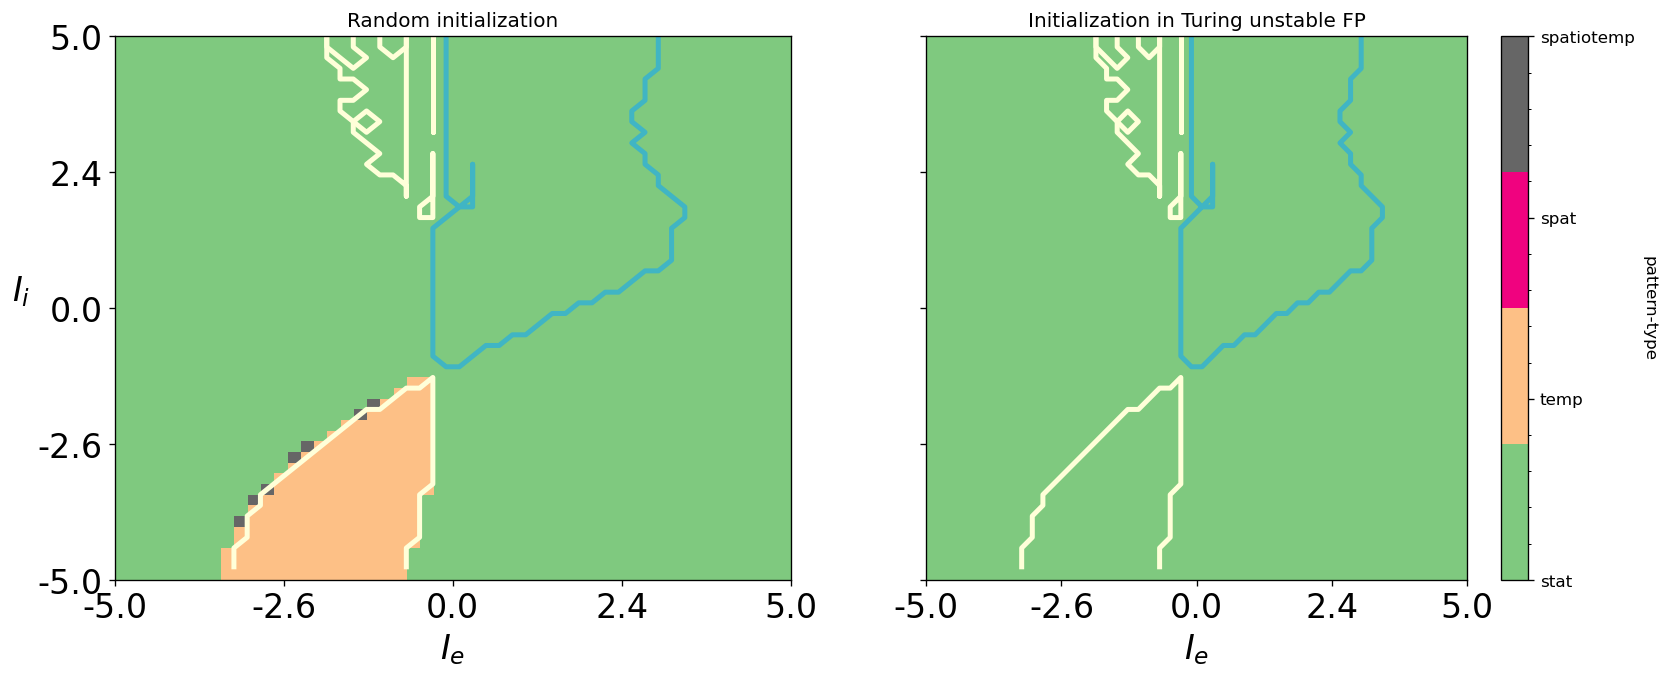

In [143]:
plot2DiscreteMaps(df2)

In [18]:
df.to_csv('trial_04.csv')

In [71]:
df = pd.read_csv('trial_01.csv')

In [142]:
df2 = pd.read_csv('trial_04.csv')

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5238/306272800.py:15: UserWarning: No contour levels were found within the data range.
  ax1.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors='black', linewidths=3, linestyles='dashed')
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5238/306272800.py:20: UserWarning: No contour levels were found within the data range.
  ax2.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors='black', linewidths=3, linestyles='dashed')
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5238/306272800.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels, fontsize=20)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5238/306272800.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels, fontsize=20)


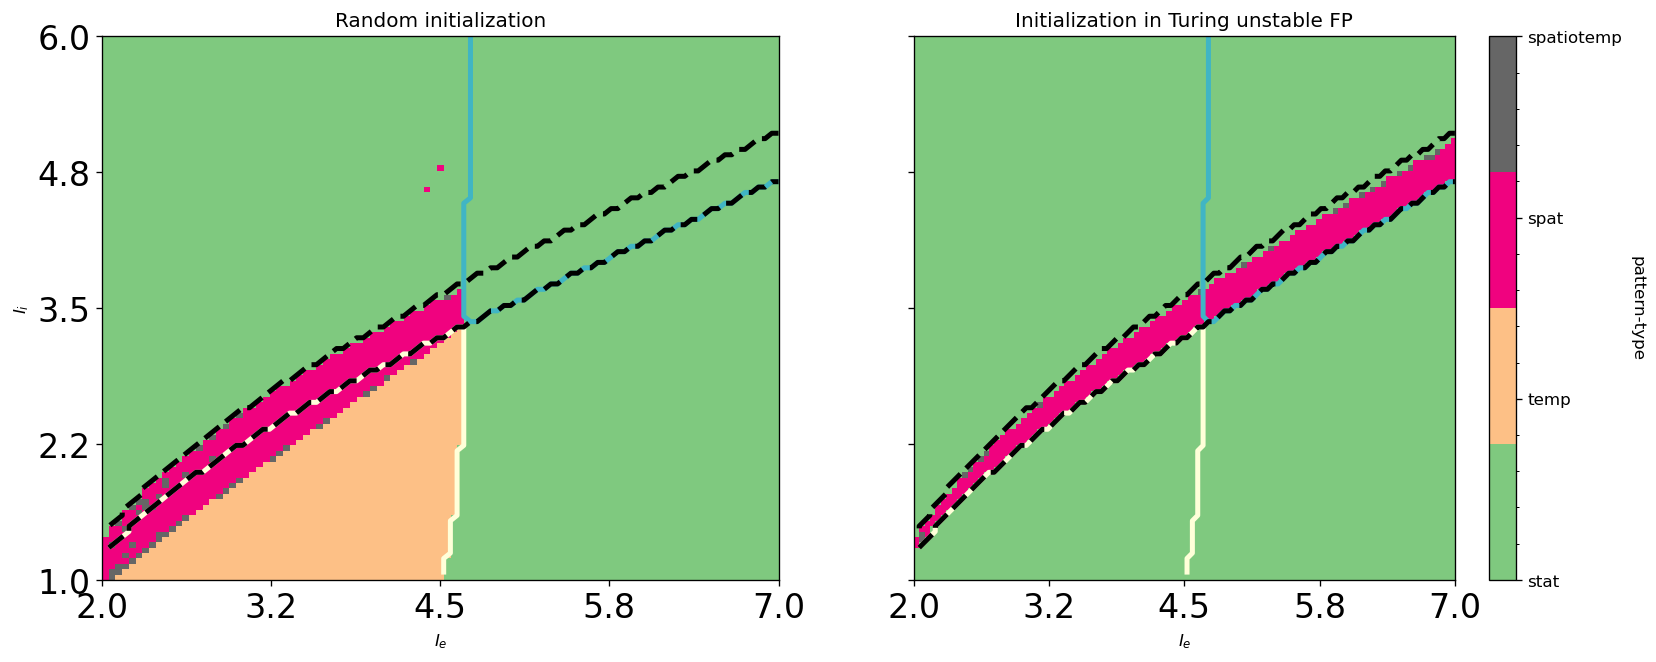

In [13]:
plot2DiscreteMaps(df2)

In [134]:
def plotQuadrants(xvalues, yvalues, axis_max = 0.4, colors=['darkgreen', 'green', 'forestgreen', 'darkseagreen', 'limegreen', 'yellowgreen', 'greenyellow']):
    
    
    rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
          "xtick.major.size" : 5, "ytick.major.size" : 5,}
    with plt.rc_context(rc):
        fig, ax = plt.subplots(figsize=(10,10))
        
        count=0
        for vals in np.stack((traces, determinants), axis=1):
            
            ax.plot(vals[0], vals[1], color=colors[count], lw=2)
            count+=1
        
        ax.scatter([0, 0, axis_max, -axis_max], [axis_max, -axis_max, 0, 0], s=0.1)
        
        
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
        
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.tick_params(axis='both', which='minor', labelsize=8)
        
        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k", 
                transform=ax.get_xaxis_transform(), clip_on=False)
        
        plt.plot

In [135]:
def plotTraceDeterminant(traces, determinants, k, 
                         colors=['darkgreen', 'green', 'forestgreen', 'darkseagreen', 'limegreen', 'yellowgreen', 'greenyellow'], 
                         ls=["", '--', '-.', ':', (0, (3, 10, 1, 10, 1, 10)), (0, (3, 1, 1, 1, 1, 1))]):
    
    plt.figure(figsize=(10,10))
    
    zero = np.zeros(len(k))
    count=0
    for vals in np.stack((traces, determinants), axis=1):
            
            plt.plot(k, vals[0], k, vals[1], color=colors[count], lw=2)#, ls=ls[count])
            count+=1
            
    plt.plot(k, zero, c='black')

In [9]:
from py.analysis import det, tr


l=101
#2.8550	2.3476	
#0.2450	2.4200	
sigma = 0.2450
tau = np.linspace(2.4201,2.4201,1)


sigma = 0.245 #b #2.8550 #a
tau = np.linspace(2.4201,2.4201,1)
traces = np.zeros((len(tau), l))
determinants = np.zeros((len(tau), l))
for idx, val in enumerate(tau):
    params={'I_e': -0.2, 'I_i': -0.452, 'end_t': 1200, 'sigma_i': sigma, 'tau_i': val}
    ps = setParams(params)
    fps = computeFPs(ps)
    stab = checkFixPtsStability(fps, ps)
    
    print('For I_i=%.4f, we have fixed points: %s, and stability: %s' %(val, str(fps), str(stab)))
    
    a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[0], ps)
    
    k = np.linspace(-2,2,l)
    determinant = det(k, a_ee, a_ei, a_ie, a_ii, ps)
    trace = tr(k, a_ee, a_ii, ps)
    traces[idx] = trace
    determinants[idx] = determinant


For I_i=2.4201, we have fixed points: [[0.12407307 0.22612162]], and stability: [0]


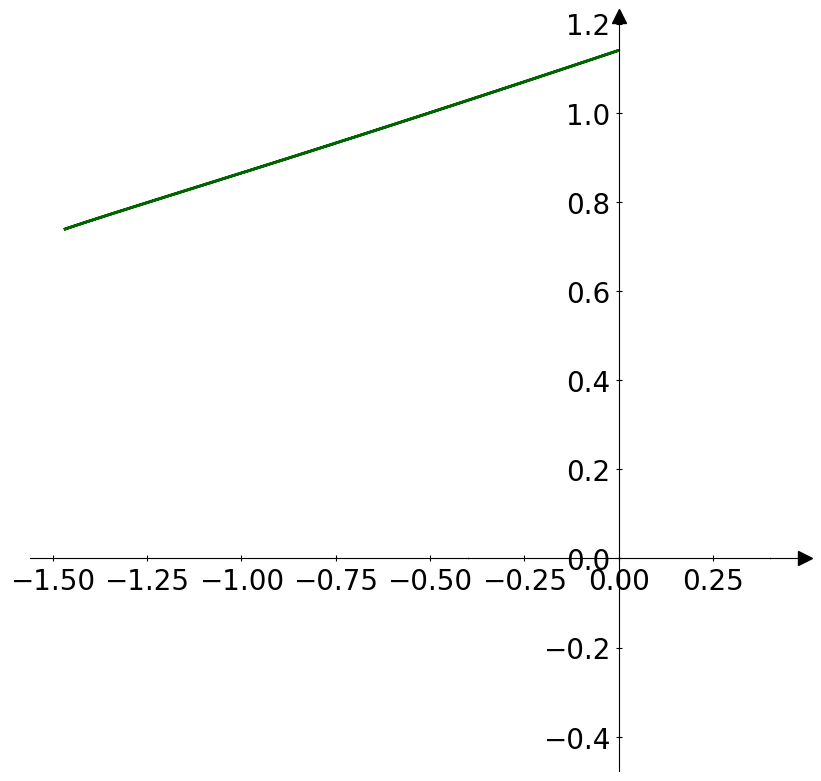

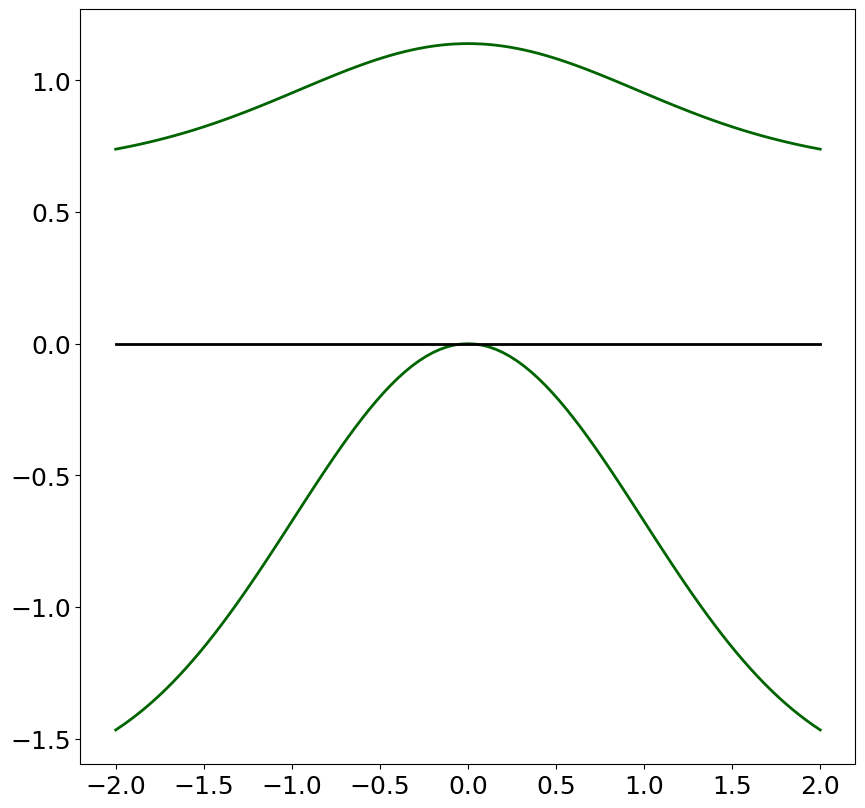

In [10]:

from py.plots.plotting import plotDiscreteMap, plotQuadrants, plotTraceDeterminant

plotQuadrants(traces, determinants)
plotTraceDeterminant(traces, determinants, k)

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(25,8))

# Set the ticks and ticklabels for all axes
plt.setp((ax0, ax1), xticks=[0,4,8], yticks=[0,4,8])

ax0.imshow(mtx1, vmin=0, vmax=1, aspect='auto')
ax1.imshow(mtx2.T, vmin=0, vmax=1, aspect='auto')
im2 = ax2.imshow(mtx3.T, vmin=-1, vmax=5, aspect='auto')

ax0.set_title(label='mass bifurcations')
ax1.set_title(label='turing results')
ax2.set_title(label='pattern analysis')
fig.colorbar(im2, orientation='vertical')

In [2]:
ee = 2.9
ii = 1.4
params={'I_e': ee, 'I_i': ii, 'n': 350, 'length': 50, 'end_t': 2000} 
ps = setParams(params)

In [298]:
params={'I_e': -0.2, 'I_i': -0.45, 'b': 0, 'end_t':10*1000, 'sigma_i': 3.2825, 'tau_i': 2.4475}
ps = setParams(params)

In [299]:
fps = computeFPs(ps)

In [300]:
fps

array([[0.12317848, 0.22565575]])

In [301]:
stab = checkFixPtsStability(fps, ps)

In [302]:
stab

[1]

In [303]:
a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[0], ps)

In [304]:
l=61
k = np.linspace(-5,5,l)
determinant = det(k, a_ee, a_ei, a_ie, a_ii, ps)
trace = tr(k, a_ee, a_ii, ps)
zero = np.zeros(l)

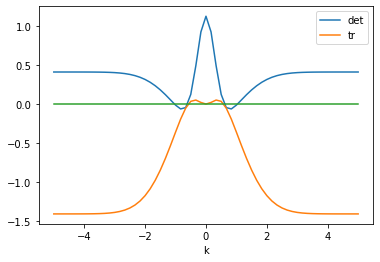

In [305]:
plt.plot(k, determinant, label='det')
plt.plot(k, trace, label='tr')
plt.plot(k, zero)
plt.xlabel('k')
plt.legend()

In [121]:
lmbda = lmbd(k, a_ee, a_ei, a_ie, a_ii, ps)

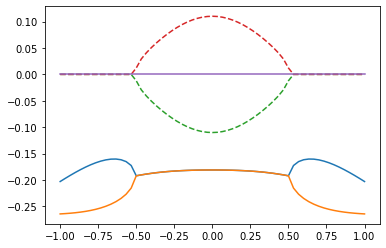

In [11]:
plt.plot(k, lmbda[0].real, k, lmbda[1].real)
plt.plot(k, lmbda[0].imag, k, lmbda[1].imag, linestyle='dashed')
plt.plot(k, zero)

In [105]:
trace2 = lmbda[0]+lmbda[1]
determinant2 = lmbda[0]*lmbda[1]

/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


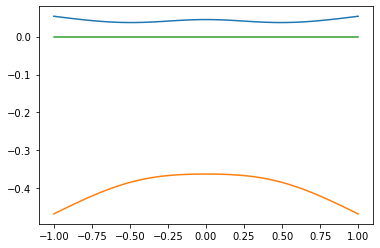

In [106]:
plt.plot(k, determinant2, k, trace2)
plt.plot(k, zero)

In [25]:
kernel = gaussian(10, ps.x)*ps.dx

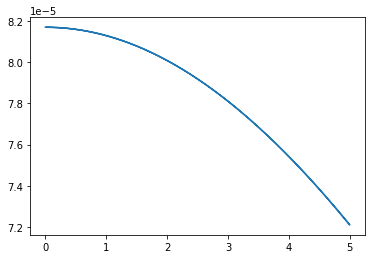

In [26]:
plt.plot(ps.x, kernel)

In [59]:
def checkTuringStability(det, tr):
    if all(det>=0) and all(tr<=0):
        turing=0
    else:
        turing=1

    return turing

In [69]:
import numpy as np
from py.params import setParams


def collectStabilities(params=None, vary_params={'I_e': np.linspace(1,5,21), 'I_i': np.linspace(0,4,21)}, pattern_analysis=False):
    
    var1_str, var1 = list(vary_params.items())[0]
    var2_str, var2 = list(vary_params.items())[1]
    var2 = var2[::-1]
    
    print(type(var1_str), type(var1))
    
    nn = len(var1)
    mm = len(var2)
    
    mass_bifs = np.zeros((nn,mm))
    turing_bifs = np.zeros((nn,mm))
    pattern_mtx = np.zeros((nn,mm))
    
    for i in range(nn):
        for j in range(mm):
            params[var1_str] = var1[i]
            params[var2_str] = var2[j]
            
            ps = setParams(params)
            fps = computeFPs(ps)
            stab = checkFixPtsStability(fps, ps)
            
            if sum(stab) == 2:
                mass_bifs[i,j] = 1
                l=61
                k = np.linspace(-2,2,l)
                a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[0], ps)
                determinant1 = det(k, a_ee, a_ei, a_ie, a_ii, ps)
                trace1 = tr(k, a_ee, a_ii, ps)
                turing1 = checkTuringStability(determinant1, trace1)
                a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[-1], ps)
                determinant2 = det(k, a_ee, a_ei, a_ie, a_ii, ps)
                trace2 = tr(k, a_ee, a_ii, ps)
                turing2 = checkTuringStability(determinant1, trace1)
                turing_bifs[i,j]=max(turing1, turing2)
                if turing1 == 1:
                    print('for I_e = %f, I_i = %f, we have turing1=%i' %(var1[i],var2[j],turing1))
                elif turing2 == 1:
                    print('for I_e = %f, I_i = %f, we have turing2=%i' %(var1[i],var2[j],turing1))
            elif sum(stab) == 1:
                mass_bifs[i,j] = 0.5
                l=61
                k = np.linspace(-2,2,l)
                a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[list(stab).index(1)], ps)
                determinant = det(k, a_ee, a_ei, a_ie, a_ii, ps)
                trace = tr(k, a_ee, a_ii, ps)
                turing = checkTuringStability(determinant, trace)
                turing_bifs[i,j]=turing
                if turing == 1:
                    print('for I_e = %f, I_i = %f, we have turing=%i' %(var1[i],var2[j],turing))
            else:
                mass_bifs[i,j] = 0
                
            
            patterns = np.zeros(len(fps))
            for idx, fp in enumerate(fps):
                p, a,b,c,d = collectPatterns(fp, ps, last_sec=10)
                patterns[idx] = p
            
            if len(patterns)==0:
                pattern_mtx[i,j] = -1
            elif all(x == patterns[0] for x in patterns):
                pattern_mtx[i,j] = patterns[0]
            else:
                pattern_mtx[i,j] = 5
                
            
            print('We are in round I_e = %f, I_i = %f, i=%i, j=%i with pattern %s' %(var1[i],var2[j],i,j, str(patterns)))
    
    return mass_bifs, turing_bifs, pattern_mtx

In [70]:
vary_params={'I_e': np.linspace(0,8,61), 'I_i': np.linspace(0,8,61)}

In [71]:
var1_str, var1 = list(vary_params.items())[0]

In [72]:
var1[::-1]

array([8.        , 7.86666667, 7.73333333, 7.6       , 7.46666667,
       7.33333333, 7.2       , 7.06666667, 6.93333333, 6.8       ,
       6.66666667, 6.53333333, 6.4       , 6.26666667, 6.13333333,
       6.        , 5.86666667, 5.73333333, 5.6       , 5.46666667,
       5.33333333, 5.2       , 5.06666667, 4.93333333, 4.8       ,
       4.66666667, 4.53333333, 4.4       , 4.26666667, 4.13333333,
       4.        , 3.86666667, 3.73333333, 3.6       , 3.46666667,
       3.33333333, 3.2       , 3.06666667, 2.93333333, 2.8       ,
       2.66666667, 2.53333333, 2.4       , 2.26666667, 2.13333333,
       2.        , 1.86666667, 1.73333333, 1.6       , 1.46666667,
       1.33333333, 1.2       , 1.06666667, 0.93333333, 0.8       ,
       0.66666667, 0.53333333, 0.4       , 0.26666667, 0.13333333,
       0.        ])

In [75]:
params={'I_e': 0, 'I_i': 0, 'end_t': 800, 'length': 50, 'sigma_i': 2}

In [ ]:
mtx1, mtx2, mtx3 = collectStabilities(params)

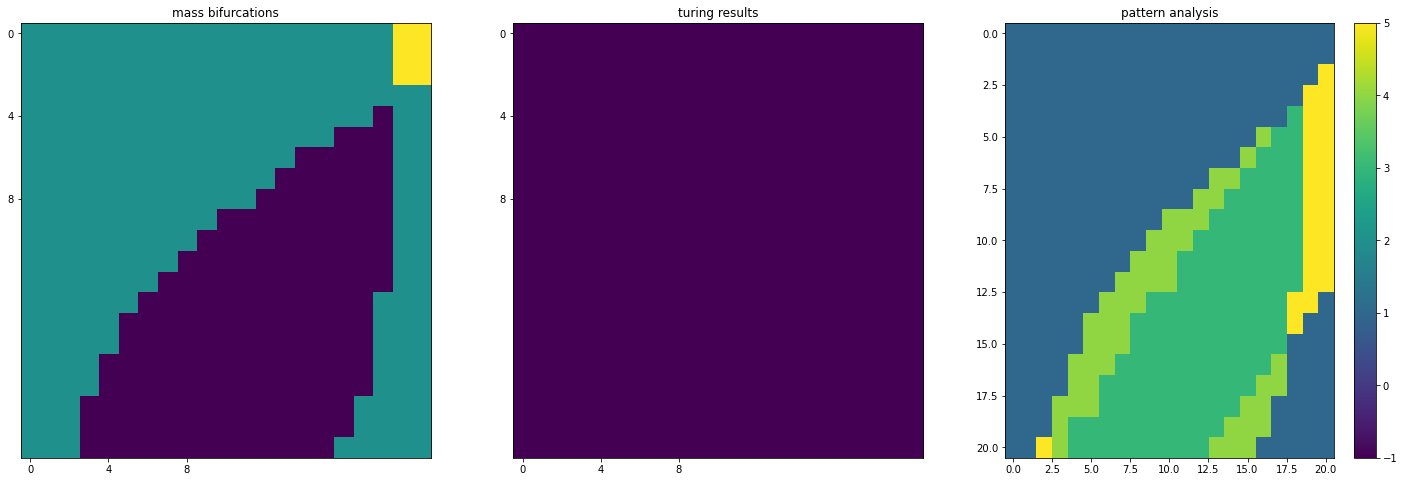

In [77]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(25,8))

# Set the ticks and ticklabels for all axes
plt.setp((ax0, ax1), xticks=[0,4,8], yticks=[0,4,8])

ax0.imshow(mtx1.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(mtx2.T, vmin=0, vmax=1, aspect='auto')
im2 = ax2.imshow(mtx3.T, vmin=-1, vmax=5, aspect='auto')

ax0.set_title(label='mass bifurcations')
ax1.set_title(label='turing results')
ax2.set_title(label='pattern analysis')
fig.colorbar(im2, orientation='vertical')

In [67]:
mtx3

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  5.,  3.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,
         3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,
         3.,  3.,  3.,  3.],
       [-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  3.,
         3.,  3.,  3.,  3.],
       [-1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  3.,  3.,
         3.,  3.,  3.,  3.],
       [-1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  3.,  3.,  3.,
         

In [68]:
def getPSD(array, fs, maxfreq=None):
    """returns the Powerspectrum (density: [V**2/Hz]) with the possibility to cut off the PSD at a maximum frequency
    
    INPUT:
    :array: time series (type: numpy-array)
    :fs: sampling frequency of array (e.g. variables['delta_t'] for array over time, variables['n'] for array over space)
    :maxfreq: maximum frequency to observe
    
    OUTPUT:
    :freqs: array of all frequencies that are looked at for the PDS
    :PSD_den: Power Spectrum Density (i.e. returns the power per frequency over the freqs array)
    """
    import scipy.signal as signal 
    
    freqs, Pxx_den = signal.welch(array, fs)
    
    if maxfreq==None:
        maxfreq = max(freqs)
    
    freqs = freqs[freqs < maxfreq]
    Pxx_den = Pxx_den[0 : len(freqs)]
    
    return freqs, Pxx_den



def getAvgPSD(arrays, fs, maxfreq=None):
    """Returns the average Power Spectrum Density for a mxn-dimensional array.
    
    INPUT:
    :arrays: mxn-dimensional array (m rows, n columns)
    :fs: sampling frequency
    :maxfreq: maximum frequency
    
    OUTPUT:
    :freqs: array of all frequencies that are looked at for the avg-PSD
    :avg_Pxx_den: average PSD (averages over rows)
    
    e.g. I give the array exc with dimension 37x4000
    then the PSD will be computed for frequencies over time and averaged over rows, which are the nodes (space)
    => returned avg_Pxx_den indicates the power per frequencies over time averaged over each node
    i.e. in that case, if the avg_Pxx_den is close to zero everywhere, I do not have a change in activity over time => temporally homogeneous
    
    """
    
    freqs, temp_Pxx_den = getPSD(arrays[0], fs, maxfreq)
    
    all_Pxx_den = np.zeros((int(arrays.shape[0]),(len(temp_Pxx_den))))
    
    for idx, array in enumerate(arrays[1:]):
        f, Pxx_den = getPSD(array, fs, maxfreq)
        all_Pxx_den[idx+1] = Pxx_den
        
    avg_Pxx_den = np.mean(all_Pxx_den, axis=0)
        
    
    return freqs, avg_Pxx_den


In [50]:
import py.continuum1d as continuum1d
c1d = continuum1d.continuum1d()



def collectPatterns(fp, params, last_sec=10):
    
    """ This function collects the type of activity-pattern that is shown after running a simulation for different settings of parameters (fix given by params, varied in trng-df DataFrame) initialized in each available fixed point per parametrization. Pattern-Identification on basis of frequency over space and over time.
    
    INPUT:
    :mtype: type of model, string, either 'activity' or 'voltage' 
    :trng_df: pandas-DataFrame, column 1 and column 2 in trng_df are the parameters that were varied, there is one column that gives all available fixed points per parametrization, named 'fixed_points' 
    :params: dictionary of fix parameters
    :variables: dictionary of variables (duration, #pixels,  delta_t)
    
    OUTPUT:
    :df: pandas-Dataframe with [varied_param1, varied_param2, patterns], where 'patterns' is a list of the same length as 'fixed_points' with numbers from 1-4, indicating the emerging pattern after initialising the model in the corresponding fixed point.
    stationary=1
    temporal=2
    spatial=3
    spatiotemporal=4
    e.g. parametrization shows 3 fixed points, [fp1, fp2, fp3], init in fp1 shows spatial, in fp2 &fp3 stationary patterns => patterns=[3,1,1]"""

    exc, inh = c1d.run(params, itype='inte_fft', fp=fp)
        
   # print('exc[-10]', exc[-10])
   # print('exc.T[-10]', exc.T[-10])
    #the returned activity is returned in shape: rows per time step, len(row)=#of pixels
    #we transpose that to have a matrix with one row per pixel, and coulmns=time steps.
    x = exc.T
    temp = int(last_sec*(1/params.dt))
    x = x[:,-temp:]
    
 #   print('x before Pxx computation', x.flatten() )
    
    
    #to identify whether there is change over time per node 
    #("per node there is a frequency>0 => temporal pattern"), we get the average
    #PSD over time and check, whether all(power(frequencies)) are close to 0: 
    #if returned false, then there is a frequency with power >0
    #i.e. a change in activity over time => temporal pattern
    #investigated time series-matrix: x=(rows=nodes, columns=time steps), 
    #e.g. 37 nodes and 5 seconds => shape=(37,5*variables['delta_t'])
    
    fs = params.n
    f_time, Pxx_den_time = getAvgPSD(x, fs)
    temporally_homogeneous = all(Pxx_den_time <=0.1*(10**(-5)))  #all(np.isclose(Pxx_den_time,0))
    
    #to identify vise verca, if there is a change in activiy over space, 
    #we check the frequency over nodes per time step, 
    #hence transpose x again
    x=x.T
    fs = params.dt
    f_space, Pxx_den_spatial = getAvgPSD(x, fs)
    spatially_homogeneous = all(Pxx_den_spatial <=0.1*(10**(-5)))  #np.isclose(Pxx_den_spatial,0))
    
    if spatially_homogeneous and temporally_homogeneous:
        pattern = 1
    elif spatially_homogeneous and not temporally_homogeneous:
        pattern = 2
    elif not spatially_homogeneous and temporally_homogeneous:
        pattern = 3
    else:
        pattern = 4
        
 #   print('In pattern collection, pattern: ', pattern)
        
    return pattern, Pxx_den_time, f_time, Pxx_den_spatial, f_space

1d Model initialised.


In [51]:
pa = {'I_e': 2.0, 'I_i': 0.75, 'end_t': 800,'length': 50}

In [52]:
ps = setParams(pa)
fps = computeFPs(ps)
stab = checkFixPtsStability(fps, ps)
fps

array([[0.313055  , 0.23289628]])

In [53]:
fp = fps[0]

In [54]:
pat, Pxx_den_time, f_time, Pxx_den_spatial, f_space = collectPatterns(fp, ps, last_sec=10)

/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 128, using nperseg = 128
  warnings.warn('nperseg = {0:d} is greater than input length '


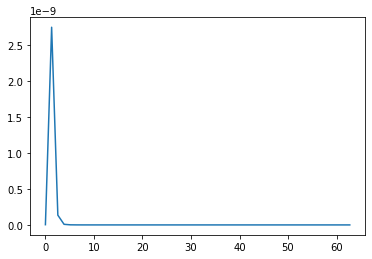

In [55]:
plt.plot(f_time, Pxx_den_time)

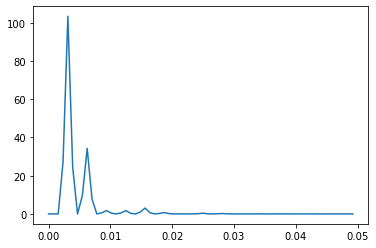

In [56]:
plt.plot(f_space,Pxx_den_spatial)

In [57]:
pat


3

In [58]:
Pxx_den_time

array([3.14853376e-12, 2.74967407e-09, 1.35697475e-10, 8.48108944e-12,
       1.35694643e-12, 3.39220764e-13, 1.10756357e-13, 4.32579461e-14,
       1.92214459e-14, 9.41540905e-15, 4.97774142e-15, 2.79820821e-15,
       1.65435298e-15, 1.02019407e-15, 6.52013864e-16, 4.29676795e-16,
       2.90773762e-16, 2.01388036e-16, 1.42350352e-16, 1.02447354e-16,
       7.49169372e-17, 5.55691818e-17, 4.17440287e-17, 3.17152295e-17,
       2.43400346e-17, 1.88481390e-17, 1.47116261e-17, 1.15631570e-17,
       9.14352553e-18, 7.26744870e-18, 5.80089070e-18, 4.64580622e-18,
       3.72973294e-18, 2.99859987e-18, 2.41169785e-18, 1.93812250e-18,
       1.55423202e-18, 1.24181231e-18, 9.86740575e-19, 7.78003547e-19,
       6.06970604e-19, 4.66851785e-19, 3.52291109e-19, 2.59059863e-19,
       1.83824423e-19, 1.23970236e-19, 7.74685916e-20, 4.27764855e-20,
       1.87625129e-20, 4.65375057e-21])